In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [3]:
# result_loc = "./../../../../Server_results/10_04_2021_less_random/"
# run_name = "experiment04_10_11_04_40"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

result_loc = "./../../../../Server_results/10_17_2021/"
run_name = "experiment15_10_12_33_19"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [4]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [5]:
q_x.shape

(61, 64, 50)

In [6]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [7]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


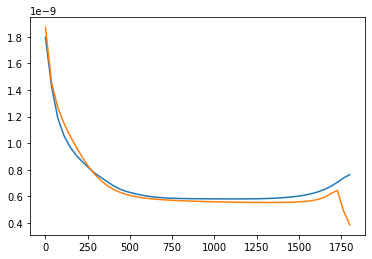

In [8]:
epoch = 1
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 11
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


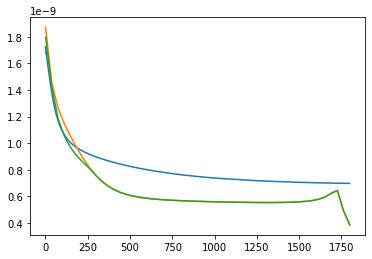

In [9]:
epoch = 11


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

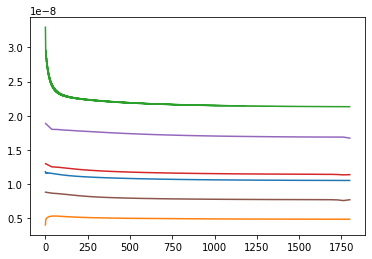

In [10]:
epoch = 31

plt.plot(q_MC_x.mean(axis=0))
plt.plot(q_MC_x.min(axis=0))
plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [25]:
p[59,:]

array([0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625,
       0.015625, 0.015625, 0.015625, 0.015625])

In [12]:
k_xy[30,:,40]

array([-1.74238114e-07, -2.20216583e-08, -1.74107643e-07, -2.20344854e-08,
       -1.14230066e-08, -1.13776014e-08, -1.14113939e-08, -1.14152424e-08,
       -1.14095184e-08, -1.14365166e-08, -1.14460208e-08, -1.14729732e-08,
       -1.14316155e-08, -1.14280721e-08, -1.14627979e-08, -1.15416103e-08,
       -1.14625895e-08, -1.14271680e-08, -1.14828803e-08, -1.14693427e-08,
       -1.14612664e-08, -1.13906157e-08, -1.14686670e-08, -1.14082465e-08,
       -1.14163301e-08, -1.14836848e-08, -1.14796318e-08, -1.14745888e-08,
       -1.14462457e-08, -1.14225585e-08, -1.15256122e-08, -1.14940375e-08,
       -1.14367849e-08, -1.14178545e-08, -1.14711284e-08, -1.14277577e-08,
       -1.14519236e-08, -1.14409676e-08, -1.14616674e-08, -1.14912685e-08,
       -1.14423807e-08, -1.13973178e-08, -1.14758286e-08, -1.14151059e-08,
       -1.14271843e-08, -1.14735663e-08, -1.14149482e-08, -1.14379669e-08,
       -1.15173077e-08, -1.15179464e-08, -1.14305256e-08, -1.13888241e-08,
       -1.14897572e-08, -

In [13]:
k_xy[29,:,40]

array([-1.74284476e-07, -2.20390492e-08, -1.14078854e-08, -1.14320429e-08,
       -1.14352333e-08, -1.13766412e-08, -1.14137645e-08, -1.14011731e-08,
       -1.14117806e-08, -1.14477541e-08, -1.14387495e-08, -1.14769620e-08,
       -1.14276420e-08, -1.14350733e-08, -1.14692771e-08, -1.15398347e-08,
       -1.14586802e-08, -1.14246755e-08, -1.14890085e-08, -1.14787003e-08,
       -1.14668363e-08, -1.13971246e-08, -1.14577029e-08, -1.14193465e-08,
       -1.14118481e-08, -1.14729586e-08, -1.14867938e-08, -1.14757527e-08,
       -1.14392278e-08, -1.14279742e-08, -1.15122920e-08, -1.14809461e-08,
       -1.14337028e-08, -1.14249415e-08, -1.14665495e-08, -1.14395314e-08,
       -1.14479235e-08, -1.14501559e-08, -1.14606805e-08, -1.14868724e-08,
       -1.14382359e-08, -1.13945730e-08, -1.14837052e-08, -1.14186918e-08,
       -1.14298493e-08, -1.14640692e-08, -1.14166268e-08, -1.14476794e-08,
       -1.15076867e-08, -1.15083282e-08, -1.14380527e-08, -1.13933762e-08,
       -1.15029485e-08, -

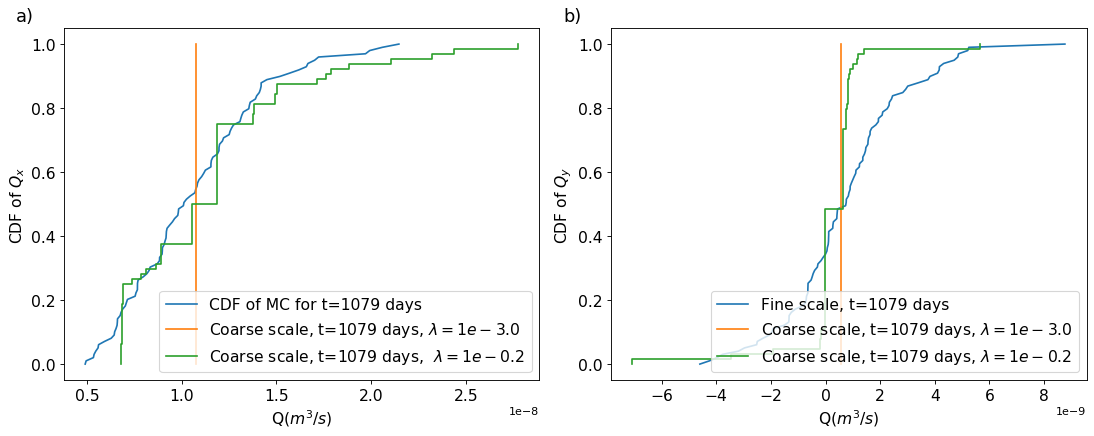

In [18]:
epoch_1 = 1
epoch_2 = 59

time_step = 30


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)


ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [15]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [17]:
# b_perc =df_perc


In [19]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.1,0.5,0.9]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [20]:
epoch = 57
t = np.linspace(0,1800,N_steps)

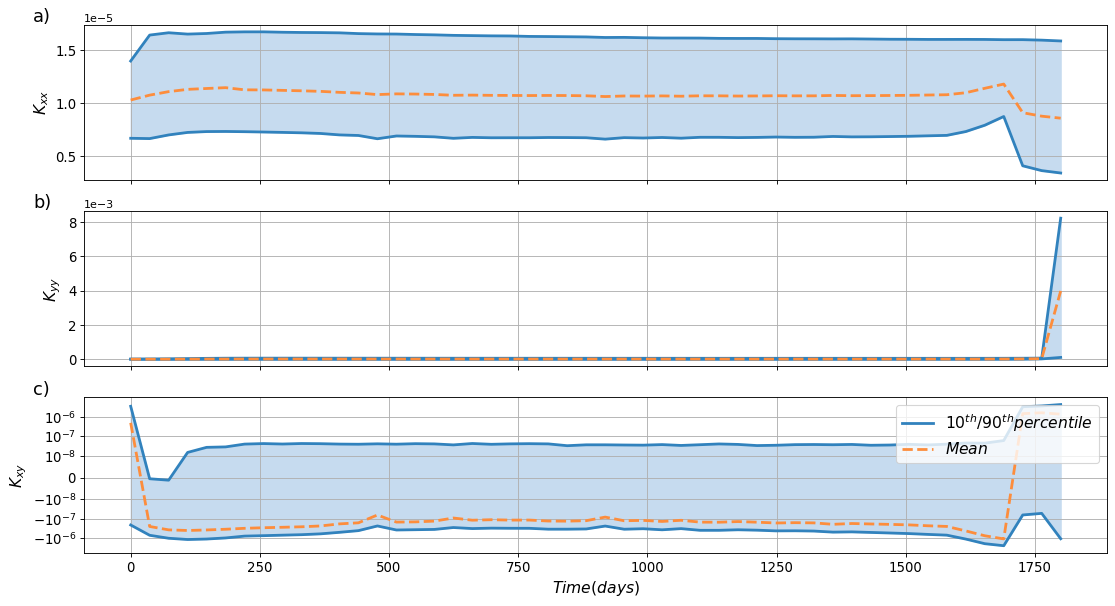

In [21]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)
